# Intern Name: Ajoe P Johnson

# The Sparks Foundation Oct2021

# GRIP Task-1: Prediction using Supervised ML

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Reading the Dataset

In [2]:
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Analysing the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

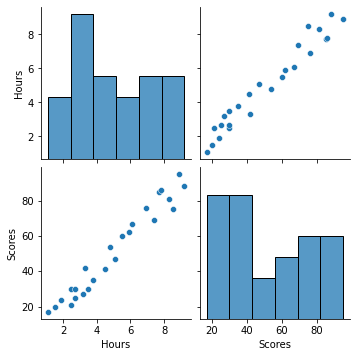

In [6]:
sns.pairplot(data)

<AxesSubplot:>

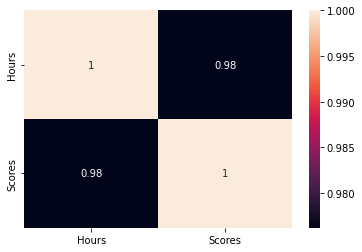

In [7]:
#correlation
corr=data.corr()
sns.heatmap(corr,annot=True)

## Dataset has linear relation

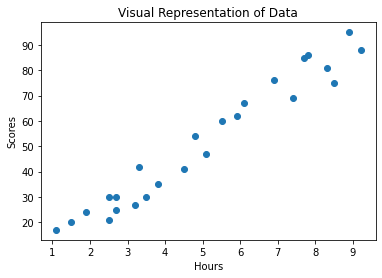

In [8]:
plt.plot(data['Hours'], data['Scores'], 'o')
plt.ylabel('Scores')
plt.xlabel('Hours')
plt.title('Visual Representation of Data')
plt.show()

## Spliting the dataset into target(y) and feature(X)

In [9]:
X=data.iloc[:,0]
y=data.iloc[:,1].values
X.shape,y.shape

((25,), (25,))

In [10]:
X=X.values.reshape(-1,1)
X.shape,y.shape

((25, 1), (25,))

## Splitting the dataset into train and test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

## Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
model.coef_

array([9.89775614])

In [14]:
model.intercept_

1.1011275945189567

In [15]:
model.score(X_test,y_test)

0.956640847232559

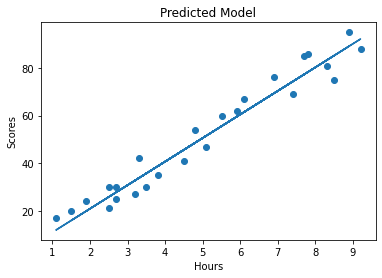

In [16]:
line = model.coef_*X + model.intercept_
plt.scatter(X, y)
plt.plot(X,line)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Predicted Model')
plt.show()

## Making Prediction

In [17]:
y_pred = model.predict(X_test)

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,15.947762
1,27,32.773947
2,69,74.344523
3,30,25.845518
4,62,59.497889
5,35,38.712601
6,24,19.906864
7,86,78.303625
8,76,69.395645
9,17,11.988659


## Evaluating the Model

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.894510863410609


## Predicting an unknown sample(9.25)

In [20]:
# You can also test with your own data
hours = [[9.25]]
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.65537184734602
